<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/SelfAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
import numpy as np

from scipy.special import softmax

In [1]:

model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [32]:
words = ["the", "quick", "brown", "fox"]


In [33]:
vectors = np.array([model[word] for word in words])

In [34]:
dot_products = np.dot(vectors, vectors.T)
weights = softmax(dot_products, axis=1)
new_vectors = np.dot(weights, vectors)



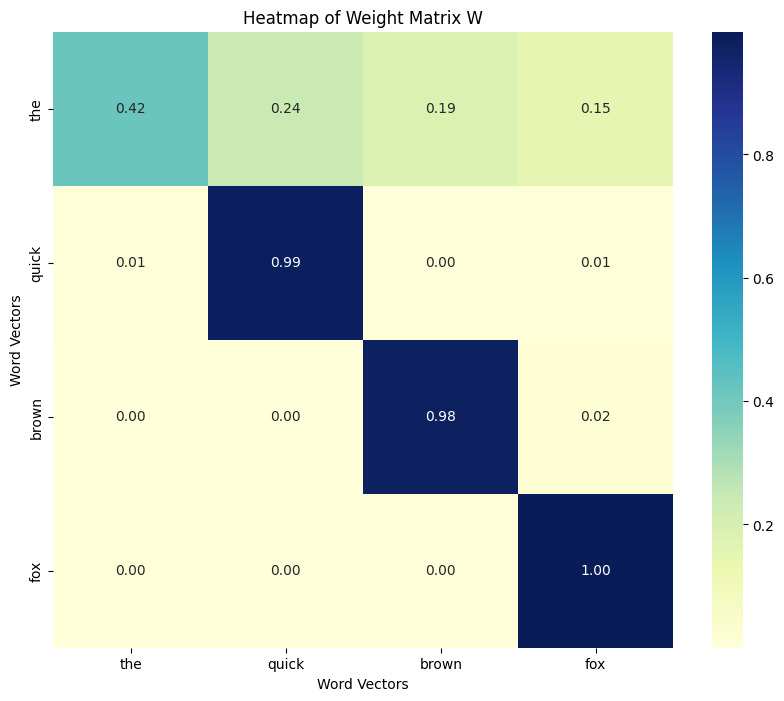

In [35]:
# Assuming 'weights' is your matrix W calculated earlier
plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=words, yticklabels=words)
plt.title("Heatmap of Weight Matrix W")
plt.xlabel("Word Vectors")
plt.ylabel("Word Vectors")
plt.show()


In [36]:
dot_products = np.dot(new_vectors, new_vectors.T)
weights = softmax(dot_products, axis=1)
new_vectors = np.dot(weights, new_vectors)

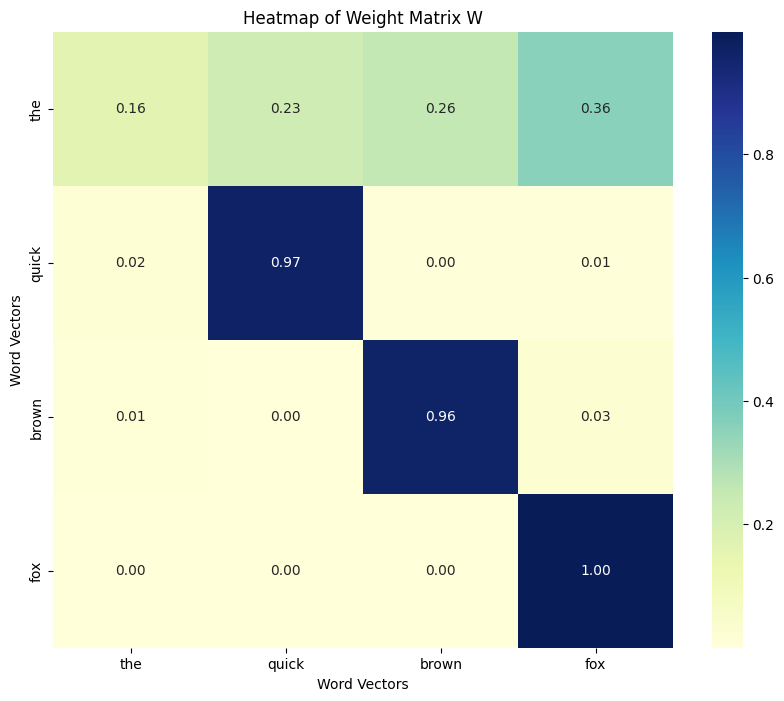

In [37]:

plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=words, yticklabels=words)
plt.title("Heatmap of Weight Matrix W")
plt.xlabel("Word Vectors")
plt.ylabel("Word Vectors")
plt.show()